# PHAS2441 Session 8:  More ODEs

Fahad Chohan
Last updated: 31/01/17

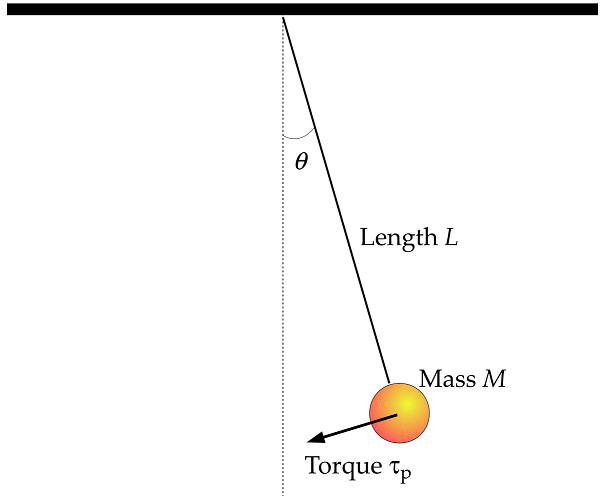

In [1]:
from IPython.display import Image # needed to embed an image
Image(filename='Pendulum.png', embed=True)

This piece of code will use the fourth-order Runge-Kutta to solve for the second order differential equation below:

$$
  \frac{d^2\theta}{dt^2}  = - \frac{g}{L}
  \sin(\theta),
$$

This is the equation for the pendulum seen above without the small angle approximation ($ \sin{\theta} \approx \theta $).

Then we will use the same method to solve for a damped pendulum which has the below equation:

$$
\frac{d^2\theta}{dt^2}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$

First we import the required modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then we define the fourth-order Runge-Kutta function.

In [3]:
def RungeKutta2d(r,tpoints):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is x, second y
            tpoints: array of time values.
    Outputs: [xpoints, ypoints]: solutions for x(t) and y(t), numpy arrays of same length as tpoints'''
    
    # initialise empty arrays
    xpoints = [] 
    ypoints = []
    
    #loop that calculates values for r using fourth-order Runge-Kutta equations
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        
        # fourth-order Runge-Kutta equations
        k1 = h*f(r,t) 
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        
        #calculates value for r
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return np.array([xpoints, ypoints]) # convert output to numpy array with 2 rows and N columns
   

# Undamped pendulum

First we split the second order differential equation of the undamped pendulum into two simultaneous first order differentials as can be seen below:

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

Then we define a function for the RHS of both these equations and arrange them into an array.

In [4]:
def f(r,t): 
    '''Definition of the vector function to be solved
    for particle subject to gravitational acceleration.
    Inputs are r (a vector) and t'''
    
    theta = r[0] # first element of r represents the angle
    w = r[1] # second element of r represents angular velocity
    
    ftheta = w # dtheta/dt is  angular velocity
    fw = -(g*np.sin(theta))/L
    
    return np.array([ftheta,fw]) # convert ftheta and fw to an array form

Now we need to set the time interval we are solving for and also the inital conditions of the system.
Then we will recall the Runge-Kutta function to generate plot points and plot a graph of angle ($\theta$) and angular velocity ($\omega$) against time.

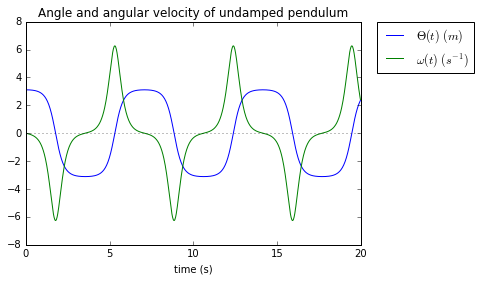

In [5]:
g = 9.8 # gravitational acceleration in m/s^2
L = 1 # length of pendulum in m

tstart = 0.0 #start of time interval
tend = 20.0 #end of time interval
N = 1000 # number of points for Runge-Kutta
h = (tend - tstart)/N 

#makes an array for tpoints
tpoints = np.arange(tstart, tend, h)

# define the initial conditions
initialtheta = 0.99*np.pi # initial angle in radians
intialw = 0 # initial angular velocity in s^-1.

#initial values for r
r = np.array([initialtheta, intialw])

rsol = RungeKutta2d(r,tpoints) # this will be an array of the solutions

#plot graph of theta and angular velocity againts time
plt.plot(tpoints,rsol[0],label="$\Theta (t)$ $(m)$")
plt.plot(tpoints,rsol[1],label="$\omega (t)$ $(s^{-1})$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y = 0
plt.xlabel("time (s)")
plt.title("Angle and angular velocity of undamped pendulum")


As you can see this is not a very sinusoidal curve and has very flat peaks for theta and the rate of change of angular velocity is also small at the peaks for theta

By using the same method as above we will repeat the process for the small angle approximation in the next code cell:


$$
  \frac{d^2\theta}{dt^2}  = - \frac{g}{L}
  \theta
$$

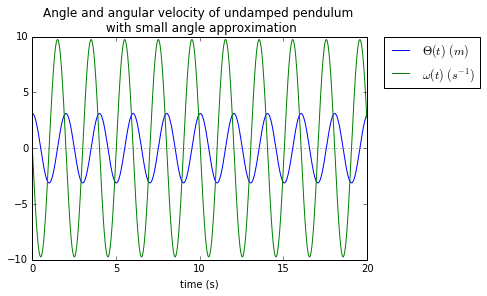

In [6]:
def f(r,t): 
    '''Definition of the vector function to be solved
    for particle subject to gravitational acceleration.
    Inputs are r (a vector) and t'''
    
    theta = r[0] # first element of r represents the angle
    w = r[1] # second element of r represents angular velocity
    
    ftheta = w # dtheta/dt is  angular velocity
    fw = -(g*theta)/L
    
    return np.array([ftheta,fw]) # convert ftheta and fw to an array form

g = 9.8 # gravitational acceleration in m/s^2
L = 1 # length of pendulum in m

tstart = 0.0 #start of time interval
tend = 20.0 #end of time interval
N = 1000 # number of points for Runge-Kutta
h = (tend - tstart)/N 

#makes an array for tpoints
tpoints = np.arange(tstart, tend, h)

# define the initial conditions
initialtheta = 0.99*np.pi # initial angle in radians
intialw = 0 # initial angular velocity in s^-1.

#initial values for r
r = np.array([initialtheta, intialw])

rsolsaa = RungeKutta2d(r,tpoints) # this will be an array of the solutions

#plot graph of theta and angular velocity againts time
plt.plot(tpoints,rsolsaa[0],label="$\Theta (t)$ $(m)$")
plt.plot(tpoints,rsolsaa[1],label="$\omega (t)$ $(s^{-1})$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y = 0
plt.xlabel("time (s)")
plt.title("Angle and angular velocity of undamped pendulum \n with small angle approximation")

As you can see for the above two graphs they have very similar shapes only when theta is small (as is expected by the approximation), but when theta is large the shape of the two graphs for theta and angular velocity are drastically different. 

The small angle approximation graph has much sharper peaks for theta and while the non-approximation graph has much flatter peaks for theta. 

Due to the small angle approximation being unnaccurate at large angles it swings much faster than expected at large angles and so therefore the pendulum is given a much larger frequency of pendulum swings, which is incorrect.

# Damped pendulum

Now we will use the same method for a damped pendulum which has an additional term to take into account:

$$ \frac{d \theta}{d t} = \omega$$

$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$

$c$ is the damping coefficient.

In [7]:
def f(r,t): 
    '''Definition of the vector function to be solved
    for particle subject to gravitational acceleration.
    Inputs are r (a vector) and t'''
    
    theta = r[0] # first element of r represents the angle
    w = r[1] # second element of r represents angular velocity
    
    ftheta = w # dtheta/dt is  angular velocity
    fw = -(g*np.sin(theta))/L -(c*w)/(M*L**2)
    
    return np.array([ftheta,fw]) # convert ftheta and fw to an array form

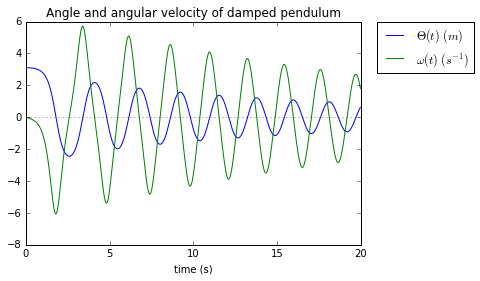

In [8]:
g = 9.8 # gravitational acceleration in m/s^2
L = 1 # length of pendulum in m
c = 0.01 # damping coefficient
M = 0.1 #mass of bob in kg

tstart = 0.0 #start of time interval
tend = 20.0 #end of time interval
N = 1000 # number of points for Runge-Kutta
h = (tend - tstart)/N 

#makes an array for tpoints
tpoints = np.arange(tstart, tend, h)

# define the initial conditions
initialtheta = 0.99*np.pi # initial angle in radians
intialw = 0 # initial angular velocity in s^-1.

#initial values for r
r = np.array([initialtheta, intialw])

rsol_d = RungeKutta2d(r,tpoints) # this will be an array of the solutions

#plot graph of theta and angular velocity againts time
plt.plot(tpoints,rsol_d[0],label="$\Theta (t)$ $(m)$")
plt.plot(tpoints,rsol_d[1],label="$\omega (t)$ $(s^{-1})$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y = 0
plt.xlabel("time (s)")
plt.title("Angle and angular velocity of damped pendulum")

This graph behaves like the undamped graph at first and then as time goes on its amplitude decreases and it starts to resemble the shape of the small angle approximation graph as it seems more sinusoidal.

# Animation

Now we will create an annimation of the damped and undamped pendulums

In [ ]:
from vpython import sphere, cylinder, color, display, rate, vector

### Animate the solution

# first set up the objects:
pivot = vector(0,0,0) # pivot point at centre of display

### For the undamped system:
# the rigid rod connecting the bob to the pivot point...
rod = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.red)
# ...and the bob.
bob = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.blue)


### For the damped system:
# the rigid rod connecting the bob to the pivot point...
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)
# ...and the bob.
bob_d = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.yellow, opacity = 0.5)

# Loop over the solution already calculated    
for i in range(0,N):
    
    ## undamped system:
    angle = rsol[0,i] 
    #  change the axis of the bob
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    ## damped system:
    angle = rsol_d[0,i] 
    #  change the axis of the bob
    rod_d.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob_d.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    rate(50) # framerate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As you can see the undamped pendulum (blue bob) behaves how you'd expect, returns to same position each time as it doesnt lose any energy and swings faster at the bottom than at the top.

And the damped pendulum loses energy each oscillation so doesnt reach the same height as it initially started at.

END CODE